### Pérez Sánchez Saúl

### Ciencias Espaciales, ENCiT

In [1]:
def conduccion_1d(k,S,L,TA,TB,N):
    
    """
    Parameters
    ---------
    L: Float
    L es la longitud del dominio.
    
    k: Float
    k es la conductividad del material.
    
    S: Float
    S es la fuente.
    
    TA: Float
    TA es la condición de frontera a la izquierda.
    
    TB: Float
    TB es la condición de frontera a la derecha.
    
    N: Int
    N es el número de nodos internos (grados de libertad).
    
    Return
    -------
    Al final esta función dibuja la solución.
    """
    
    import numpy as np
    import matplotlib.pyplot as plt

   # L = 5.0
   # k = 0.02
   # S = 8000
   # TA = 200
   # TB = 1000

   # N = 500
    h = L / (N+1)

    T = np.zeros(N+2)
    b = np.zeros (N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:]= S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1

    A[-1,2] = -1
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T,'o-')
    plt.title("Modelo de conducción térmica en 1 D")
    plt.ylabel("Temperatura")
    plt.xlabel("Nodos internos")
    plt.show()

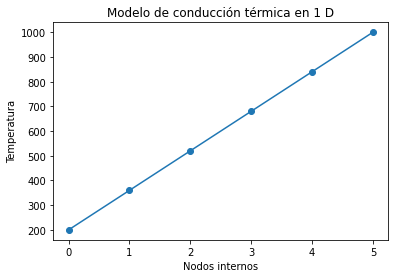

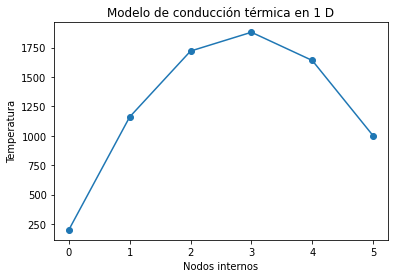

In [2]:
# Se está invocando la función cuyos parámetros tienen los valores manejados en clase.
a = conduccion_1d(0.02,0.0,5.0,200,1000,4)

#Se invoca la función con una variación en la fuente para observar el cambio en su comportamiento.
b= conduccion_1d(0.02,8.0,5.0,200,1000,4)

In [3]:
# Se importa la librería para poder adaptar la gráfica y poder cambiar los valores de los parámetros
# para ver su comportamiento
import ipywidgets as widgets

In [4]:
# Se realiza una grafica interactiva cuyos valores de fuente y número de nodos puede variar; y evaluar su comportamiento.
w = widgets.interactive(conduccion_1d,
                        k = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max = 1.0,min = 0.0,value = 0,step = 0.2),
                        L = widgets.fixed(5.0),
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        N = widgets.IntSlider(max=10,min=4,value=4))
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…